In [33]:
import random
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [34]:
sns.set(rc={"lines.linewidth": 2.8}, font_scale=2)
sns.set_style("whitegrid")

In [35]:
# We implement our own very simple mixture, relying on scipy for the mixture
# components.

class SimpleGaussianMixture(object):

  def __init__(self, mixture_weights, mixture_components):
    self.mixture_weights = mixture_weights
    self.mixture_components = mixture_components

  def sample(self, num_samples):
    # First sample from the mixture
    mixture_choices = np.random.choice(range(0, len(self.mixture_weights)), 
                               p=self.mixture_weights, size=num_samples)
    # And then sample from the chosen mixture
    return np.array(
          [self.mixture_components[mixture_choice].rvs(size=1)
           for mixture_choice in mixture_choices])

  def pdf(self, x):
    value = 0.
    for index, weight in enumerate(self.mixture_weights):
      # Assuming using scipy distributions for components
      value += weight * self.mixture_components[index].pdf(x)
    return value

In [36]:
mix = 0.4
mixture_weight = [mix, 1.-mix]
mixture_components = [scipy.stats.norm(loc=-1, scale=0.1), scipy.stats.norm(loc=1, scale=0.5)]

mixture = SimpleGaussianMixture(mixture_weight, mixture_components)

In [37]:
mixture.sample(10)

array([[ 0.75383334],
       [ 1.24201996],
       [-1.04060963],
       [ 1.42525398],
       [ 0.93582511],
       [ 1.47486342],
       [-0.92105315],
       [-0.80483345],
       [ 1.0657222 ],
       [-1.02506691]])

In [7]:
data_samples = mixture.sample(30)
len(data_samples)

30

In [8]:
data_samples

array([[-0.97323424],
       [-1.0470932 ],
       [ 1.11375941],
       [-1.0299095 ],
       [ 1.18544444],
       [-0.95062037],
       [ 1.15422657],
       [ 0.89836783],
       [ 1.7675516 ],
       [ 1.095563  ],
       [-1.02956469],
       [-1.11303481],
       [ 0.80691701],
       [ 1.13462753],
       [ 0.95981831],
       [-0.9461018 ],
       [-0.93078469],
       [-1.01289572],
       [ 1.90209728],
       [ 0.89919575],
       [-0.99764721],
       [ 0.60490847],
       [-0.93374045],
       [-1.03554107],
       [-1.03514943],
       [ 0.38852197],
       [ 0.89344454],
       [-1.07734792],
       [-0.96623254],
       [ 1.0816676 ]])

([], [])

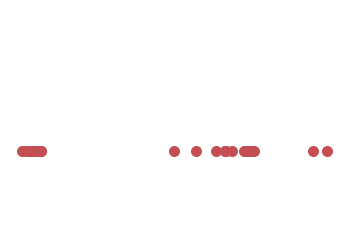

In [9]:
plt.figure()
plt.plot(data_samples, [0] * len(data_samples), 'ro', ms=10, label='data')
plt.axis('off')
plt.ylim(-1, 2)
plt.xticks([])
plt.yticks([])

In [10]:
# Use another set of samples to exemplify samples from the model
data_samples2 = mixture.sample(30)

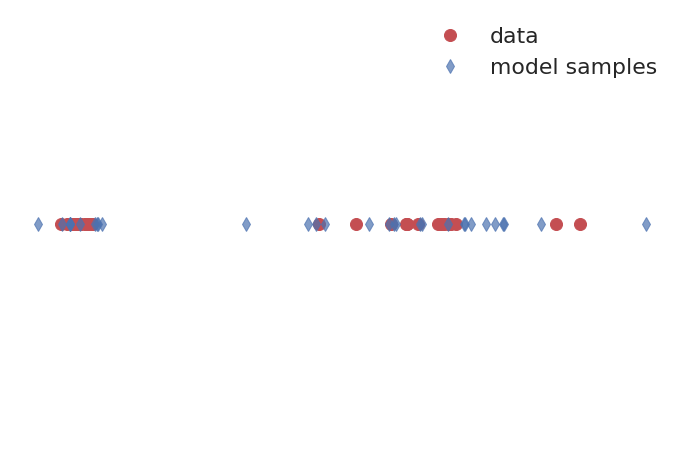

In [11]:
plt.figure(figsize=(12,8))
plt.plot(data_samples, [0] * len(data_samples), 'ro', ms=12, label='data')
plt.plot(data_samples2, [0] * len(data_samples), 'bd', ms=10,  alpha=0.7, label='model samples')
plt.axis('off')
# plt.ylim(-0.2, 2)
# plt.xlim(-2, 3)
plt.xticks([])
plt.yticks([])
plt.legend(framealpha=0.)

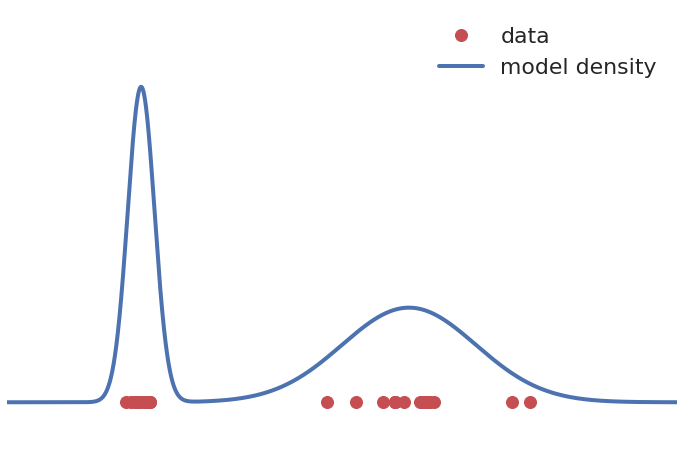

In [12]:
plt.figure(figsize=(12,8))
plt.plot(data_samples, [0] * len(data_samples), 'ro', ms=12, label='data')

x_vals = np.linspace(-2., 3., int(1e4))
pdf_vals = mixture.pdf(x_vals)
plt.plot(x_vals, pdf_vals, linewidth=4, label='model density')

plt.axis('off')
plt.ylim(-0.2, 2)
plt.xlim(-2, 3)
plt.xticks([])
plt.yticks([])
plt.legend(framealpha=0)

In [2]:
import glob
import tensorflow as tf
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time

from IPython import display

In [3]:
#BUFFER_SIZE = 60000
#BATCH_SIZE = 256
# Batch and shuffle the data
#train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [93]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(2, use_bias=False, input_shape=(2,)))
    #model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    #model.add(layers.Dense(16, use_bias=False))
    #assert model.output_shape == (None, 7, 7, 256)  # Note: None is the batch size
    #model.add(layers.BatchNormalization())
    #model.add(layers.ReLU())

    #assert model.output_shape == (None, 7, 7, 128)
    #model.add(layers.Dense(8, use_bias=False))
    #model.add(layers.BatchNormalization())
    #model.add(layers.ReLU())


    #assert model.output_shape == (None, 14, 14, 64)
    #model.add(layers.Dense(4, use_bias=False))
    #model.add(layers.BatchNormalization())
    #model.add(layers.ReLU())


    #assert model.output_shape == (None, 1, 1, 1)
    model.add(layers.Dense(1, use_bias=True))
    return model

In [94]:
generator = make_generator_model()

#noise = tf.random.normal([1, 64])
#generated_data = generator(noise, training=False)

#plt.imshow(generated_image[0, :, :, 0], cmap='gray')

In [95]:
generator.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 2)                 4         
_________________________________________________________________
re_lu_11 (ReLU)              (None, 2)                 0         
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 3         
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________


In [82]:
#noise = tf.random.normal([1,64])
generated_data = generator(noise, training=False)

In [83]:
noise = tf.random.normal([1,2])
noise.shape

TensorShape([1, 2])

In [127]:
generated_data

<tf.Tensor: shape=(32, 1), dtype=float32, numpy=
array([[0.7136264 ],
       [0.26764596],
       [0.26768205],
       [0.82638514],
       [0.26763856],
       [0.26768732],
       [0.26768732],
       [1.1603692 ],
       [0.53985   ],
       [0.26768732],
       [0.26767802],
       [0.80986524],
       [0.26763862],
       [0.9439447 ],
       [0.65340424],
       [0.6282903 ],
       [0.50153154],
       [0.8410909 ],
       [0.26765114],
       [0.5571579 ],
       [0.26767024],
       [0.85680634],
       [0.34185302],
       [0.8253779 ],
       [0.6634437 ],
       [0.26764068],
       [0.2676458 ],
       [0.2676264 ],
       [0.26768732],
       [1.0165384 ],
       [0.26762587],
       [0.34860325]], dtype=float32)>

In [149]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(2, use_bias=False, input_shape=(1,)))
    model.add(layers.ReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Dense(1, use_bias=False))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))
    model.add(layers.Softmax())

    return model

In [150]:
discriminator = make_discriminator_model()
decision = discriminator(generated_data)
print (decision)

tf.Tensor(
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]], shape=(32, 1), dtype=float32)


In [151]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [152]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [153]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [154]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [155]:
samples = mixture.sample(32)
train_samples = tf.convert_to_tensor(samples)

In [156]:
EPOCHS = 100
noise_dim = 2
BUFFER_SIZE = 4
BATCH_SIZE = 2

In [169]:
real_output = discriminator(samples, training=False)
fake_output = discriminator(generated_data, training=False)

In [171]:
fake_output

<tf.Tensor: shape=(32, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)>

In [172]:
disc_loss = discriminator_loss(real_output, fake_output)

In [174]:
disc_loss

<tf.Tensor: shape=(), dtype=float32, numpy=1.6265235>

In [161]:
#train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
#train_images = (train_images - 127.5) / 127.5  # Normalize the images to [-1, 1]
# Batch and shuffle the data
train_dataset = tf.data.Dataset.from_tensor_slices(train_samples).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [162]:
@tf.function
def train_step(sample_data):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_data = generator(noise, training=True)

      real_output = discriminator(sample_data, training=True)
      fake_output = discriminator(generated_data, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)
      print ('Generator Loss for current epoch  is {}'.format(gen_loss))
      print ('Discriminator Loss for current epoch  is {} '.format(disc_loss))
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
  
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [163]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

In [164]:
def train(sample_dataset, epochs):
  for epoch in range(epochs):
    start = time.time()

    for sample in sample_dataset:
      train_step(sample)

    # Produce images for the GIF as you go
    #display.clear_output(wait=True)
    #generate_and_save_images(generator,
    #                         epoch + 1,
    #                         seed)

    # Save the model every 15 epochs
    if (epoch + 1) % 15 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)

    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  # Generate after the final epoch
  #display.clear_output(wait=True)
  #generate_and_save_images(generator,
  #                         epochs,
  #                         seed)

In [165]:
train(train_dataset, EPOCHS)

Generator Loss for current epoch  is Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
Discriminator Loss for current epoch  is Tensor("add:0", shape=(), dtype=float32) 
Generator Loss for current epoch  is Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
Discriminator Loss for current epoch  is Tensor("add:0", shape=(), dtype=float32) 
Time for epoch 1 is 3.8641138076782227 sec
Time for epoch 2 is 0.17959356307983398 sec
Time for epoch 3 is 0.20914602279663086 sec
Time for epoch 4 is 0.21333813667297363 sec
Time for epoch 5 is 0.18563294410705566 sec
Time for epoch 6 is 0.18998122215270996 sec
Time for epoch 7 is 0.17719030380249023 sec
Time for epoch 8 is 0.182204008102417 sec
Time for epoch 9 is 0.17997241020202637 sec
Time for epoch 10 is 0.18816685676574707 sec
Time for epoch 11 is 0.1737520694732666 sec
Time for epoch 12 is 0.1940298080444336 sec
Time for epoch 13 is 0.18467092514038086 sec
Time for epoch 14 is 0.192819833755

In [179]:
noise = tf.random.normal([32,2])
generated_data = generator(noise, training=False)

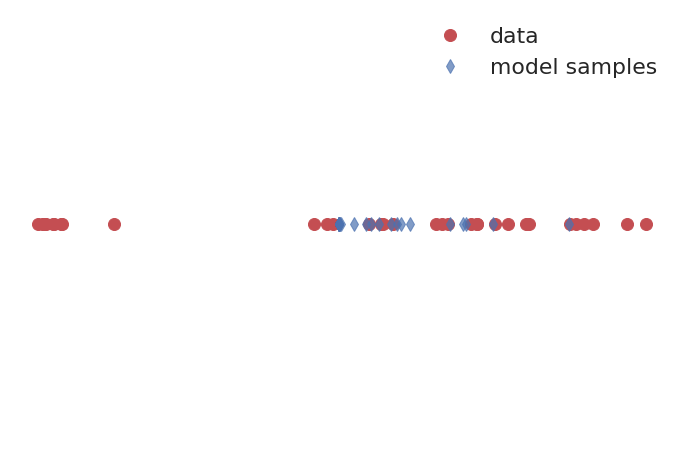

In [180]:
plt.figure(figsize=(12,8))
plt.plot(samples, [0] * len(samples), 'ro', ms=12, label='data')
plt.plot(generated_data, [0] * len(generated_data), 'bd', ms=10,  alpha=0.7, label='model samples')
plt.axis('off')
# plt.ylim(-0.2, 2)
# plt.xlim(-2, 3)
plt.xticks([])
plt.yticks([])
plt.legend(framealpha=0.)

![title](img/divergences.png)

In [ ]:
#The cross entropy loss from real fake classification relates to KL Divergence Model and it is hard to recognize the small distribution in mixture models
#The mapping also being referred as "Helvetica scenario"
#Image taken from A NOTE ON THE EVALUATION OF GENERATIVE MODELS

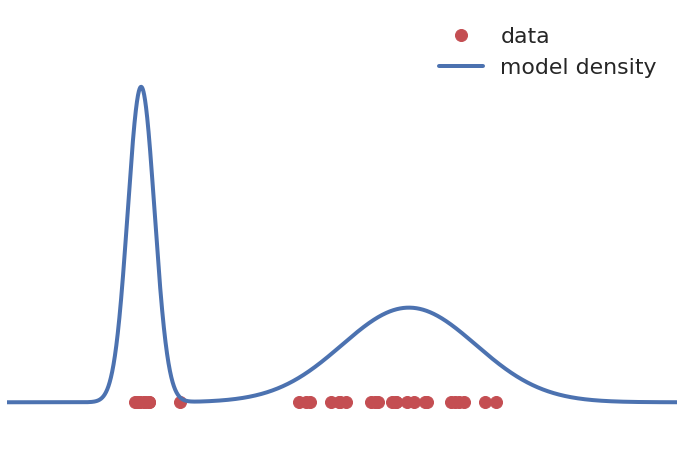

In [168]:
plt.figure(figsize=(12,8))
plt.plot(samples, [0] * len(samples), 'ro', ms=12, label='data')

x_vals = np.linspace(-2., 3., int(1e4))
pdf_vals = mixture.pdf(x_vals)
plt.plot(x_vals, pdf_vals, linewidth=4, label='model density')

plt.axis('off')
plt.ylim(-0.2, 2)
plt.xlim(-2, 3)
plt.xticks([])
plt.yticks([])
plt.legend(framealpha=0)